## Disha Balpande

# Task 5 Exploratory Data Analysis - Sports

<b>Task Explanation</b>
<br> Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.<br>
Suggest teams or players a company should endorse for its products.

----

This dataset is Indian Premier League from 2008 to 2018.

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


<font size="+2" color="blue"><b>Data</b></font><br>

In [2]:
deliveries = pd.read_csv("C:/Users/LOKESH ARUN BHIRUD/Desktop/Tasks Reference/deliveries.csv")
matches = pd.read_csv("C:/Users/LOKESH ARUN BHIRUD/Desktop/Tasks Reference/matches.csv",parse_dates=['date'])

In [4]:
print(deliveries.info())
deliveries.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

match_id  inning         batting_team    bowling_team  over  ball  \
179073     11415       2  Chennai Super Kings  Mumbai Indians    20     2   
179074     11415       2  Chennai Super Kings  Mumbai Indians    20     3   
179075     11415       2  Chennai Super Kings  Mumbai Indians    20     4   
179076     11415       2  Chennai Super Kings  Mumbai Indians    20     5   
179077     11415       2  Chennai Super Kings  Mumbai Indians    20     6   

          batsman non_striker      bowler  is_super_over  ...  bye_runs  \
179073  RA Jadeja   SR Watson  SL Malinga              0  ...         0   
179074  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179075  SR Watson   RA Jadeja  SL Malinga              0  ...         0   
179076  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   
179077  SN Thakur   RA Jadeja  SL Malinga              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
179073            0            0             0             1           0   
179074            0            0             0             2           0   
179075            0            0             0             1           0   
179076            0            0             0             2           0   
179077            0            0             0             0           0   

        total_runs  player_dismissed dismissal_kind    fielder  
179073           1               NaN            NaN        NaN  
179074           2               NaN            NaN        NaN  
179075           1         SR Watson        run out  KH Pandya  
179076           2               NaN            NaN        NaN  
179077           0         SN Thakur            lbw        NaN  

[5 rows x 21 columns]

In [5]:
print(matches.info())
matches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null datetime64[ns]
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: datetime64[ns](1), int64(5), object(12)
memory usage: 106.4+ KB
None


id  season       city       date                        team1  \
0   1    2017  Hyderabad 2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune 2017-04-06               Mumbai Indians   
2   3    2017     Rajkot 2017-04-07                Gujarat Lions   
3   4    2017     Indore 2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore 2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN


<font size="+2" color="blue"><b>Cleaning</b></font><br>

In [6]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)



<font size="+2" color="blue"><b>Umpires</b></font><br>

In [7]:
print("No. of Umpires 1: ",matches['umpire1'].nunique())
print("No. of Umpires 2: ",matches['umpire2'].nunique())
print("No. of Umpires 3: ",matches['umpire3'].nunique())

ump_set1 = set(matches['umpire1'].unique())               
ump_set2 = set(matches['umpire2'].unique())
ump_set3 = set(matches['umpire3'].unique())
all_set = ump_set1.intersection(ump_set2)
all_set = all_set.intersection(ump_set3)
print("Umpires who umpired as 1st,2nd and 3rd umpires: ",all_set, len(all_set))

No. of Umpires 1:  61
No. of Umpires 2:  65
No. of Umpires 3:  25
Umpires who umpired as 1st,2nd and 3rd umpires:  {nan, 'Yeshwant Barde', 'K Ananthapadmanabhan', 'A Nanda Kishore', 'S Ravi', 'Nitin Menon', 'Chris Gaffaney', 'Kumar Dharmasena', 'Bruce Oxenford', 'Nanda Kishore', 'Ian Gould', 'Anil Chaudhary', 'Nigel Llong', 'Anil Dandekar', 'O Nandan', 'Vineet Kulkarni', 'KN Ananthapadmanabhan', 'Ulhas Gandhe', 'Rod Tucker', 'C Shamshuddin'} 20


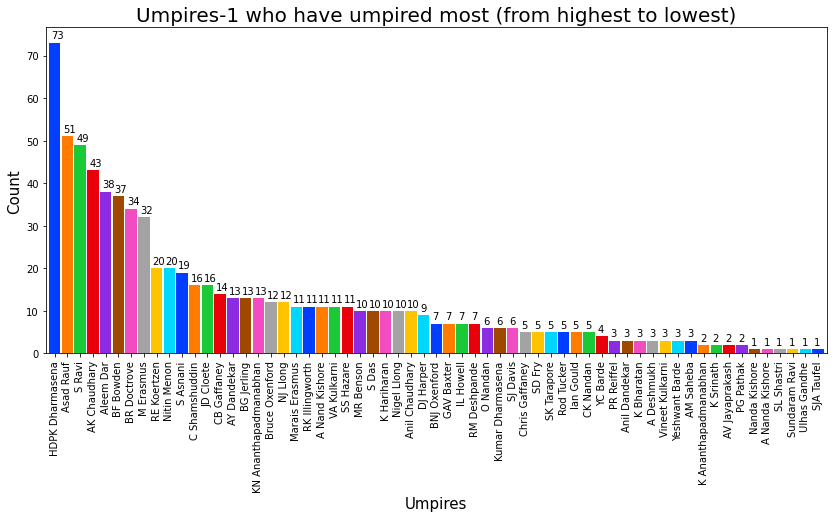

In [8]:
plt.subplots(figsize=(14,6))
ax=matches['umpire1'].value_counts().plot.bar(width=0.9,color=sns.color_palette('bright',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-1 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

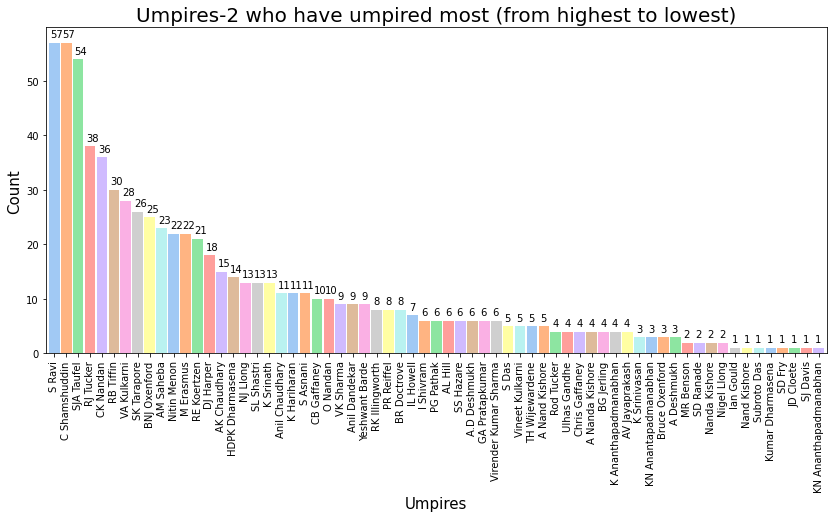

In [9]:
plt.subplots(figsize=(14,6))
ax=matches['umpire2'].value_counts().plot.bar(width=0.9,color=sns.color_palette('pastel',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-2 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()

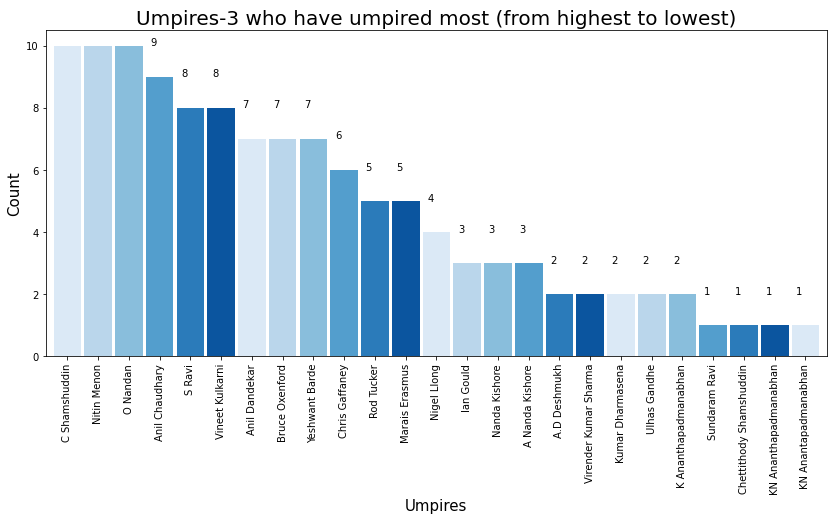

In [10]:
plt.subplots(figsize=(14,6))
ax=matches['umpire3'].value_counts().plot.bar(width=0.9,color=sns.color_palette('Blues'))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xlabel("Umpires", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Umpires-3 who have umpired most (from highest to lowest)", fontsize=20)
plt.show()


<font size="+2" color="blue"><b>Winning Teams</b></font><br>

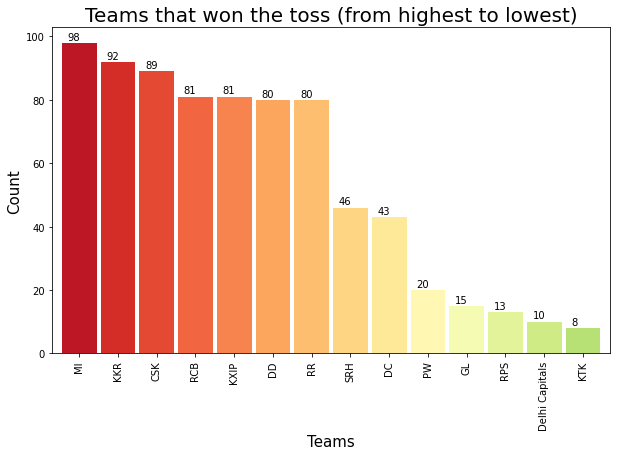

In [11]:
plt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Teams that won the toss (from highest to lowest)", fontsize=20)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()


<font size="+2" color="blue"><b>Toss Decision</b></font><br>

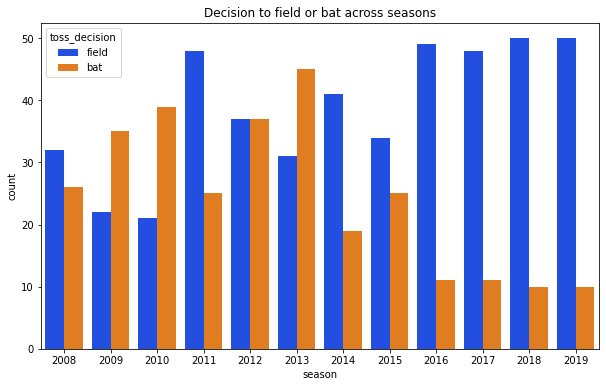

In [13]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches ,palette=sns.color_palette('bright'))
plt.title("Decision to field or bat across seasons")
plt.show()


<font size="+2" color="blue"><b>Matches info</b></font><br>

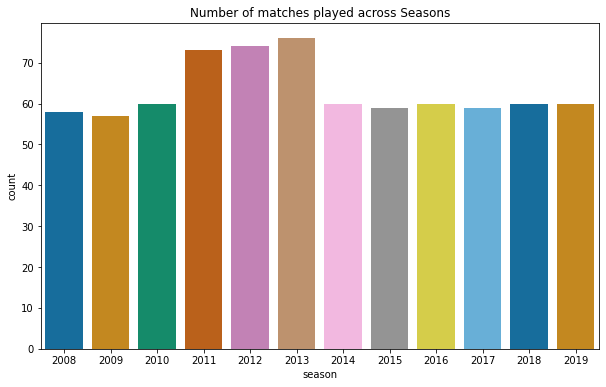

In [15]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',data=matches,palette=sns.color_palette('colorblind'))  #countplot automatically counts the frequency of an item
plt.title("Number of matches played across Seasons")
plt.show()

In [16]:
pm = matches.groupby(['player_of_match'])['id'].count().reset_index('player_of_match').rename(columns={'player_of_match':'player','id':'count'})#.sort_values(ascending=False)
pm = pm.sort_values(by="count",ascending=False)
top_pm=pm[:10]

fig = go.Figure(data=[go.Scatter(
    x=top_pm['player'], y=top_pm['count'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)','rgb(92, 65, 54)','rgb(150, 65, 54)','rgb(30, 165, 54)',
              'rgb(100, 180, 120)', 'rgb(200, 90, 89)', 'rgb(225, 78, 124)'],
        opacity=[1, 0.9, 0.8,0.7, 0.6,0.5,0.45,0.4,0.35,0.3],
        size=[100, 90, 80, 70,60,50,40,30,20,10],
    )
)])
fig.update_layout(
    title="Players who recieved 'Player of Match' Award most",
    xaxis=dict(
        title='Players',        
    ),
    yaxis=dict(
        title='Number',       
    ))
fig.show()


<font size="+2" color="blue"><b>Venues and Cities</b></font><br>

In [17]:
print("Total number of Cities played: ",matches['city'].nunique())
print("Total number of Venues played: ",matches['venue'].nunique())

Total number of Cities played:  32
Total number of Venues played:  41


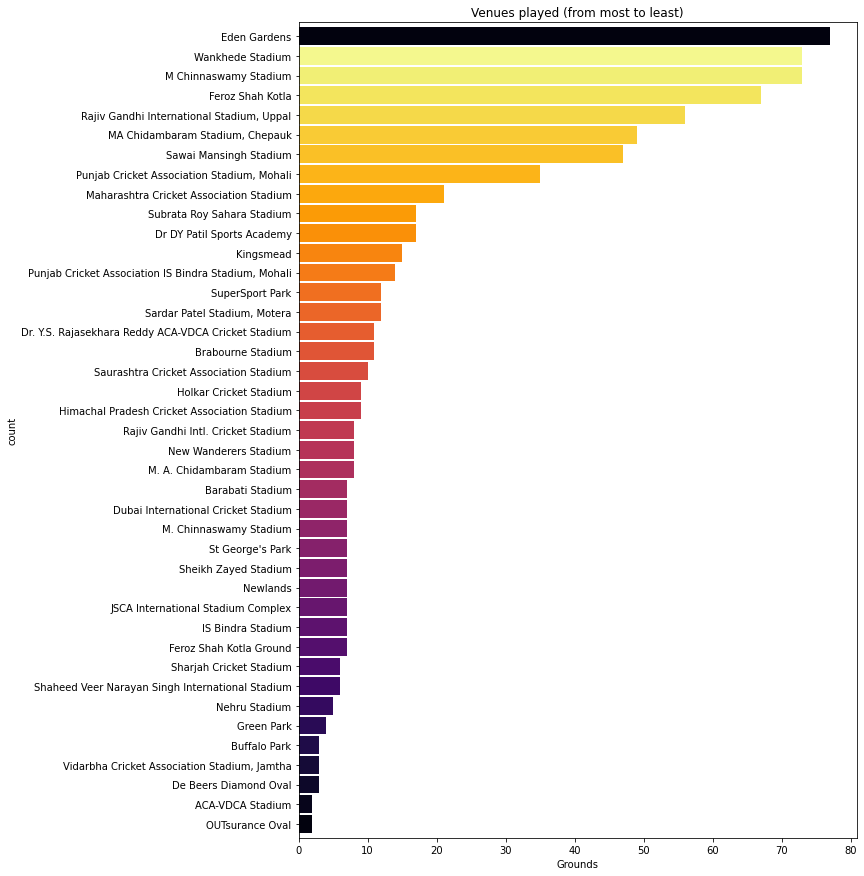

In [18]:
plt.subplots(figsize=(10,15))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.title("Venues played (from most to least)")
plt.show()

In [21]:
cities = matches.groupby(['season','city'])['id'].agg('count').reset_index()
cities.rename(columns={'id':'count'}, inplace=True)

fig = px.bar(cities, x="city", y="count", color='season')
fig.show()

print(matches.columns)


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')



<font size="+2" color="blue"><b>Match Results</b></font><br>

In [23]:
not_same = matches[matches['toss_winner'] != matches['winner']]
same = matches[matches['toss_winner'] == matches['winner']]
print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/matches.shape[0],2) * 100)
toss_winner = pd.DataFrame({'result':['Yes','No'],'per':[same.shape[0], not_same.shape[0]] })
print(" = " * 40)
field = matches[matches['toss_decision'] == 'field']
bat = matches[matches['toss_decision'] == 'bat']
print("Percentage of matches where toss decision is 'field': ",round(field.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where toss decision is 'bat': ",round(bat.shape[0]/matches.shape[0],2) *100)
print(" = " * 40)
normal = matches[matches['result'] == 'normal']
tie = matches[matches['result'] == 'tie']
no_result = matches[matches['result'] == 'no result']
print("Percentage of matches where result is 'normal': ",round(normal.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where result is 'tie': ",round(tie.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where result is 'no result': ",round(no_result.shape[0]/matches.shape[0],2) *100)
result = pd.DataFrame({'Result':['Normal','Tie','No Result'],'per':[normal.shape[0], tie.shape[0], no_result.shape[0]] })
print(" = " * 40)
dl_applied_no = matches[matches['dl_applied'] == 0]
dl_applied_yes = matches[matches['dl_applied'] == 1]
dl = pd.DataFrame({'dl_applied':['yes','no'],'per':[dl_applied_yes.shape[0], dl_applied_no.shape[0]] })
print("Percentage of matches where DL is applied : ",round(dl_applied_yes.shape[0]/matches.shape[0],2) *100)
print("Percentage of matches where DL is not applied : ",round(dl_applied_no.shape[0]/matches.shape[0],2) *100)

# Pie Chart for Whether toss winner is same as match winner
fig = px.pie(toss_winner, values='per', names='result', color='result', title='Is Match winner same as toss winner?'
             ,color_discrete_map={'Yes':'lightcyan',
                                 'No':'royalblue' })
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Pie Chart for how many matches DL is applied
fig = px.pie(dl, values='per', names='dl_applied', title='Percentage of matches where DL is applied', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

labels = result['Result']
values = result['per']

# Pie Chart for results of the matches played
fig = go.Figure(data=[go.Pie(labels=labels,title='Result of matches', values=values, pull=[0, 0.2, 0])])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Percentage of matches where toss winner is not same as winner:  48.0
Percentage of matches where toss winner is same as winner:  52.0
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Percentage of matches where toss decision is 'field':  61.0
Percentage of matches where toss decision is 'bat':  39.0
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Percentage of matches where result is 'normal':  98.0
Percentage of matches where result is 'tie':  1.0
Percentage of matches where result is 'no result':  1.0
 =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  =  = 
Percentage of matches where DL is applied :  3.0
Percentage of matches where DL is not applied :  97.0


In [24]:
matches['date'].min(), matches['date'].max()

(Timestamp('2008-04-18 00:00:00'), Timestamp('2019-12-05 00:00:00'))


<font size="+2" color="blue"><b>Batsmen Highest Runs, 1s, 2s, 4s </b></font><br>

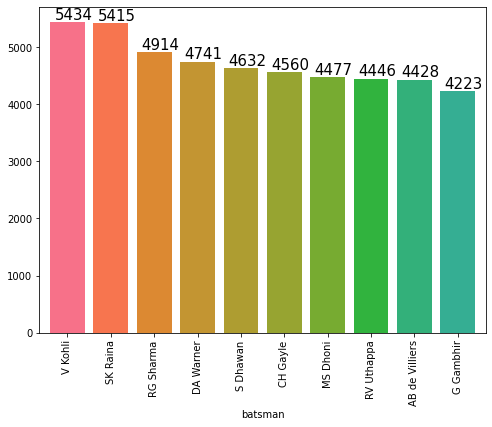

In [26]:
plt.subplots(figsize=(8,6))
b = deliveries.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]

ax=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

<font size="+1" color="blue"><b>Most 1s, 2s, 4s</b></font><br>

C:\Users\LOKESH ARUN BHIRUD\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\LOKESH ARUN BHIRUD\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\LOKESH ARUN BHIRUD\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\LOKESH ARUN BHIRUD\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecat

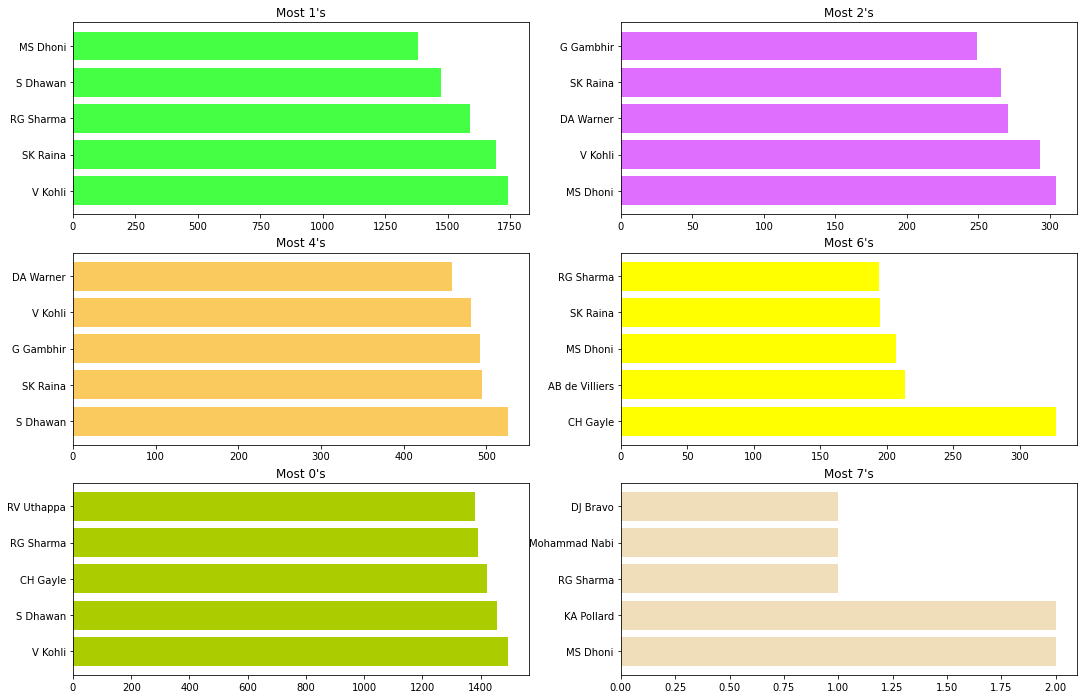

In [27]:
top_batsman = deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
top_batsman = top_batsman.pivot('batsman','batsman_runs','total_runs')

fig,ax=plt.subplots(3,2,figsize=(18,12))
top_batsman[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
top_batsman[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
top_batsman[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
top_batsman[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
top_batsman[0].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,0],color='#abcd00',width=0.8)
ax[2,0].set_title("Most 0's")
ax[2,0].set_ylabel('')
top_batsman[7].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,1],color='#f0debb',width=0.8)
ax[2,1].set_title("Most 7's")
ax[2,1].set_ylabel('')
plt.show()

<font size="+1" color="blue"><b>Top Scorers</b></font><br>

In [28]:
top_scorers = deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

match_id         batsman batting_team  batsman_runs
6200        411        CH Gayle          RCB           175
900          60     BB McCullum          KKR           158
8426        562  AB de Villiers          RCB           133
10149      7935         RR Pant           DD           130
9257        620  AB de Villiers          RCB           129
5585        372        CH Gayle          RCB           128
3135        206         M Vijay          CSK           127
529          36       DA Warner          SRH           126
7752        516        V Sehwag         KXIP           122
10417      7953       SR Watson          CSK           121


<font size="+2" color="blue"><b>Runs </b></font><br>

<font size="+1" color="blue"><b>Total runs across the seasons</b></font><br>

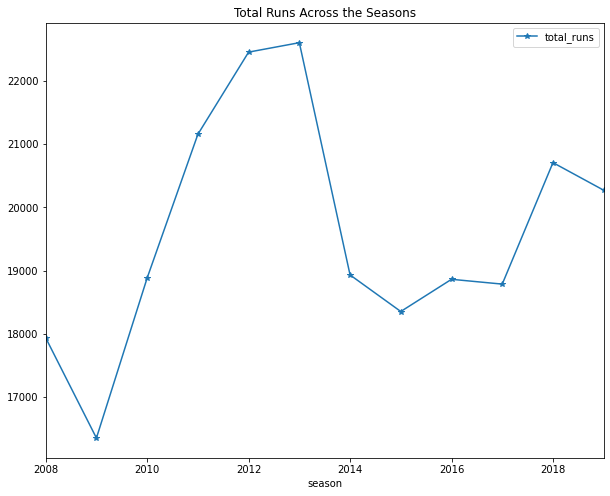

In [30]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

<font size="+1" color="blue"><b>Graph of top 5 run scorer batsmen </b></font><br>

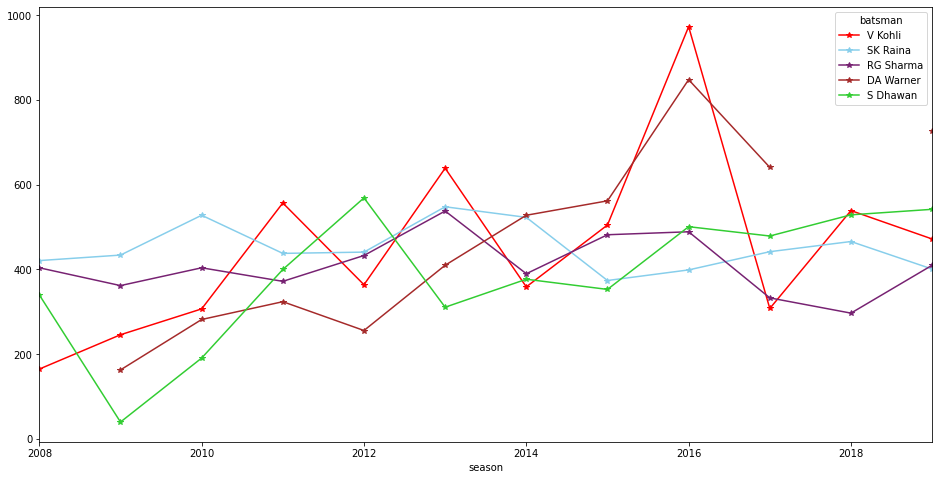

In [32]:
men = batsmen.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
men = men.groupby(['season','batsman'])['batsman_runs'].sum().unstack().T
men['Total'] = men.sum(axis=1)
men = men.sort_values(by='Total',ascending=False)[:5]
men.drop('Total',axis=1,inplace=True)
men.T.plot(color=['red','skyblue','#772272','brown','limegreen'],marker='*')
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

<font size="+1" color="blue"><b>Graphs of 4s and 6s across Seasons</b></font><br>

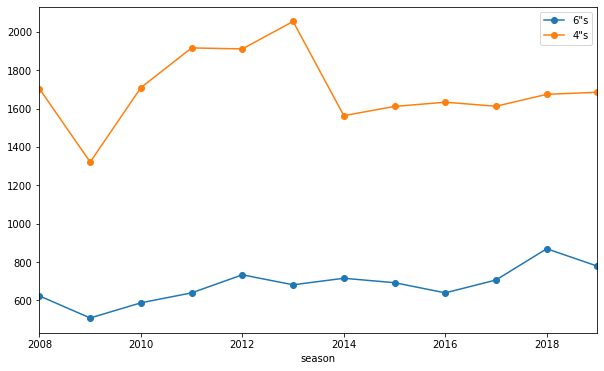

In [34]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


<font size="+1" color="blue"><b>Total Runs made by teams</b></font><br>

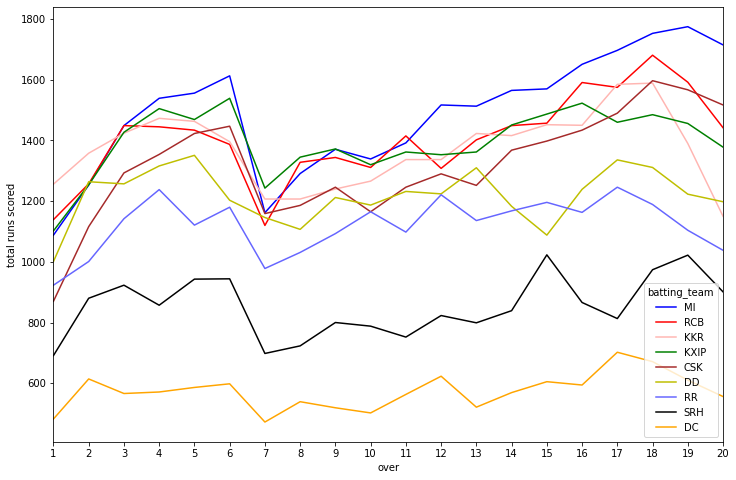

In [36]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']

matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']

matches_played_byteams.set_index('Team',inplace=True)

runs_per_over = deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500']) #plotting graphs for teams that have played more than 100 matches
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


<font size="+2" color="blue"><b>200+ scores</b></font><br>

In [37]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

match_id  inning batting_team bowling_team  total_runs
829        411       1          RCB           PW         263
1370      7937       1          KKR         KXIP         250
1250       620       1          RCB           GL         248
416        206       1          CSK           RR         246
1498     11338       1          KKR           MI         241
122         61       1          CSK         KXIP         240
1134       562       1          RCB           MI         235
1426     11147       1          SRH          RCB         233
596        296       1         KXIP          RCB         232
1500     11339       1          SRH         KXIP         232

---------

# Thank You